In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

In [2]:
# PixeLib 제공 모델 다운로드
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 
urllib.request.urlretrieve(model_url, model_file)
# segmentation 모델 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

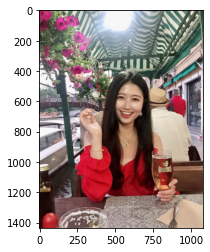

In [3]:
# image load
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/3.png'  
img_orig2 = cv2.imread(img_path2) 
plt.imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))
plt.show()

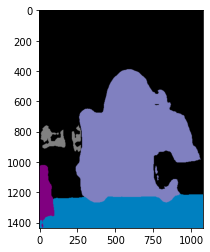

background
bottle
car
diningtable
person


In [4]:
# segmentAsPascalvoc()함수 호출 하여 입력된 이미지 분할
segvalues2, output2=model.segmentAsPascalvoc(img_path2)
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
# segmentAsPascalvoc()함수 호출 하여 입력된 이미지 분할
plt.imshow(output2)
plt.show()
for class_id in segvalues2['class_ids']:
    print(LABEL_NAMES[class_id])

(1435, 1077)


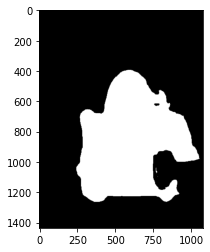

In [7]:
# 사람 나태는 15번째 색상 RGB로 변경
seg_color = (128,128,192)
# seg_color로만 이루어진 마스크 생성
seg_map2 = np.all(output2==seg_color, axis=-1)
print(seg_map2.shape)
plt.imshow(seg_map2, cmap='gray')
plt.show()

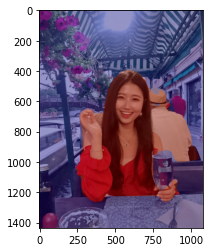

In [8]:
# 마스크랑 원본 이미지 합쳐보기
img_show2 = img_orig2.copy()
img_mask2 = seg_map2.astype(np.uint8) * 255
color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)
img_show2 = cv2.addWeighted(img_show2, 0.6, color_mask2, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))
plt.show()

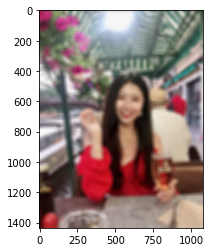

In [9]:
# 배경 blur 처리
img_orig_blur2 = cv2.blur(img_orig2, (30,30))
plt.imshow(cv2.cvtColor(img_orig_blur2, cv2.COLOR_BGR2RGB))
plt.show()

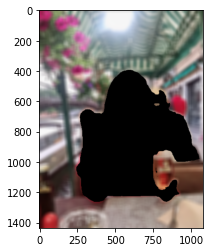

In [10]:
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출
img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)
img_bg_mask2 = cv2.bitwise_not(img_mask_color2)
img_bg_blur2 = cv2.bitwise_and(img_orig_blur2, img_bg_mask2)
plt.imshow(cv2.cvtColor(img_bg_blur2, cv2.COLOR_BGR2RGB))
plt.show()

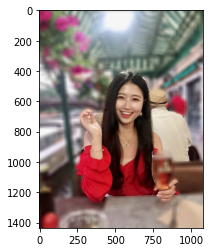

In [12]:
# 흐린 배경과 원본 이미지 합성
img_concat2 = np.where(img_mask_color2==255, img_orig2, img_bg_blur2)
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.show()